<a href="https://colab.research.google.com/github/Mano-hard/gdp-per-capita-forecast/blob/main/gdp_per_capita_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Real-time CSV URL from World Bank (Indicator: NY.GDP.PCAP.CD)
url = "https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv"

# Download and extract the correct file manually for now (simulate load)
from zipfile import ZipFile
import io
import requests

r = requests.get(url)
z = ZipFile(io.BytesIO(r.content))
csv_filename = [name for name in z.namelist() if name.endswith('.csv') and 'Metadata' not in name][0]
df_raw = pd.read_csv(z.open(csv_filename), skiprows=4)


In [ ]:
# Filter for India
df = df_raw[df_raw['Country Name'] == 'India']

# Select year columns
gdp_df = df.loc[:, '2000':'2023'].T
gdp_df.columns = ['GDP_per_Capita']
gdp_df.index.name = 'Year'
gdp_df.reset_index(inplace=True)
gdp_df['Year'] = gdp_df['Year'].astype(int)
gdp_df['GDP_per_Capita'] = pd.to_numeric(gdp_df['GDP_per_Capita'], errors='coerce')
gdp_df.dropna(inplace=True)
gdp_df.set_index('Year', inplace=True)

gdp_df.tail()


,GDP_per_Capita
Year,
2019,2041.428637
2020,1907.042516
2021,2239.613844
2022,2347.448294
2023,2530.120313


from matplotlib import pyplot as plt
_df_0['GDP_per_Capita'].plot(kind='hist', bins=20, title='GDP_per_Capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GDP_per_Capita'].plot(kind='line', figsize=(8, 4), title='GDP_per_Capita')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['GDP_per_Capita'].plot(kind='hist', bins=20, title='GDP_per_Capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Year', y='GDP_per_Capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['GDP_per_Capita']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('GDP_per_Capita')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Year'}, axis=1)
              .sort_values('Year', ascending=True))
  xs = counted['Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['GDP_per_Capita'].plot(kind='line', figsize=(8, 4), title='GDP_per_Capita')
plt.gca().spines[['top', 'right']].set_visible(False)

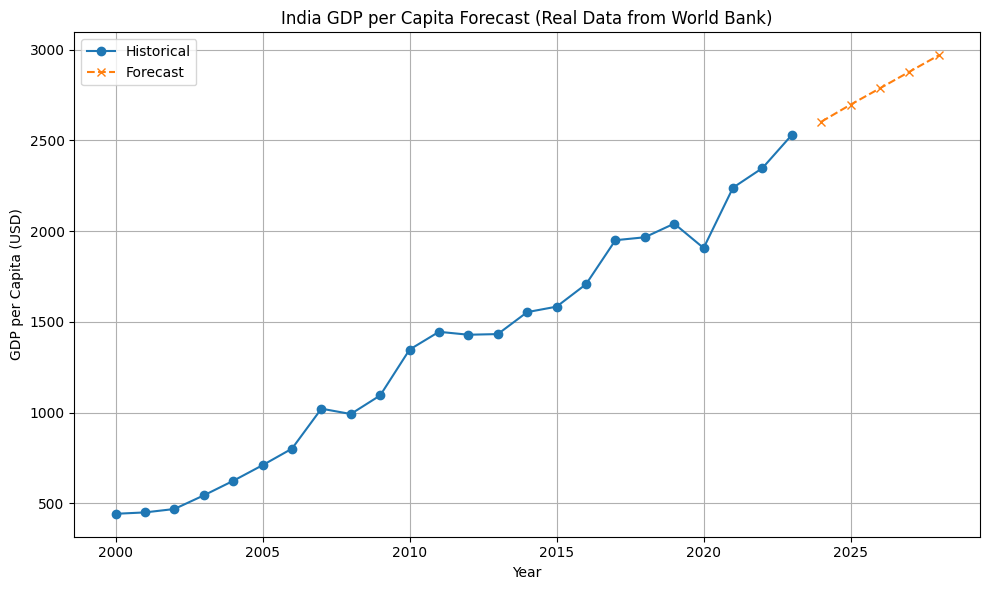


📊 Forecasted GDP per Capita & Year-on-Year Growth from 2023:

      Forecasted_GDP_per_Capita  YoY_Growth_%
Year                                         
2024                    2602.76          2.87
2025                    2697.20          3.63
2026                    2787.32          3.34
2027                    2878.29          3.26
2028                    2969.10          3.15


In [ ]:
model = ARIMA(gdp_df['GDP_per_Capita'], order=(1, 2, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=5)

# Future years
future_years = list(range(gdp_df.index.max() + 1, gdp_df.index.max() + 6))
forecast_df = pd.DataFrame({'Year': future_years, 'Forecasted_GDP_per_Capita': forecast})
forecast_df.set_index('Year', inplace=True)

# Combine
combined = pd.concat([gdp_df, forecast_df], axis=0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(gdp_df.index, gdp_df['GDP_per_Capita'], label="Historical", marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted_GDP_per_Capita'], linestyle='--', marker='x', label="Forecast")
plt.title("India GDP per Capita Forecast (Real Data from World Bank)")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Get 2023 GDP per capita (last historical value)
gdp_2023 = gdp_df.loc[2023, 'GDP_per_Capita']

# Combine forecast with 2023 for growth calculation
growth_df = forecast_df.copy()
growth_df['Base_GDP'] = [gdp_2023] + forecast_df['Forecasted_GDP_per_Capita'].tolist()[:-1]
growth_df['YoY_Growth_%'] = ((growth_df['Forecasted_GDP_per_Capita'] - growth_df['Base_GDP']) / growth_df['Base_GDP']) * 100

# Round values
growth_df = growth_df.round(2)

# Display
print("\n📊 Forecasted GDP per Capita & Year-on-Year Growth from 2023:\n")
print(growth_df[['Forecasted_GDP_per_Capita', 'YoY_Growth_%']])

